Cargamos las librerias a utilizar.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Importamos los datos.

In [2]:
E_Commerce_test = pd.read_excel('E-Commerce_test.xlsx')
E_Commerce_train = pd.read_excel('E-Commerce_train.xlsx')

Exploramos los datos

Estudiamos como estan compuestos.

In [3]:
# Qúe tamaños tienen los datos?
E_Commerce_train.shape

(8999, 12)

In [4]:
# Cúales son sus columnas?
E_Commerce_train.columns

Index(['ID', 'Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls',
       'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases',
       'Product_importance', 'Gender', 'Discount_offered', 'Weight_in_gms',
       'Reached.on.Time_Y.N'],
      dtype='object')

In [5]:
# Hay valores nulos?
E_Commerce_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8999 entries, 0 to 8998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   8999 non-null   int64 
 1   Warehouse_block      8999 non-null   object
 2   Mode_of_Shipment     8999 non-null   object
 3   Customer_care_calls  8999 non-null   int64 
 4   Customer_rating      8999 non-null   int64 
 5   Cost_of_the_Product  8999 non-null   int64 
 6   Prior_purchases      8999 non-null   int64 
 7   Product_importance   8999 non-null   object
 8   Gender               8999 non-null   object
 9   Discount_offered     8999 non-null   int64 
 10  Weight_in_gms        8999 non-null   int64 
 11  Reached.on.Time_Y.N  8999 non-null   int64 
dtypes: int64(8), object(4)
memory usage: 843.8+ KB


In [6]:
# Corroboramos que no haya valores nulos.
E_Commerce_train.isnull().sum()

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

In [7]:
# Cómo se distribuyen las variables numéricas?
# También describimos los datos a nivel estadístico.
E_Commerce_train.describe()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,8999.00000,8999.000000,8999.000000,8999.000000,8999.000000,8999.000000,8999.000000,8999.000000
mean,4500.00000,4.015113,2.994999,208.561507,3.511501,15.097678,3584.364596,0.635515
std,2597.93187,1.138934,1.413143,48.289172,1.532074,17.400040,1614.750194,0.481312
min,1.00000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,2250.50000,3.000000,2.000000,168.000000,3.000000,4.000000,1857.000000,0.000000
50%,4500.00000,4.000000,3.000000,211.000000,3.000000,8.000000,4046.000000,1.000000
75%,6749.50000,5.000000,4.000000,249.500000,4.000000,19.000000,4999.500000,1.000000
max,8999.00000,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


In [8]:
# Cómo se distribuyen las variables categóricas?
E_Commerce_train.describe(include=['O'])

,Warehouse_block,Mode_of_Shipment,Product_importance,Gender
count,8999,8999,8999,8999
unique,5,3,3,2
top,F,Ship,low,F
freq,2999,6122,4308,4540


Estudiamos la variable target(Objetivo)

La comparamos con distintas variables

In [9]:
# Productos alcanzados a tiempo vs productos que lleragon tarde.
E_Commerce_train.groupby(['Reached.on.Time_Y.N']).count()['ID']

Reached.on.Time_Y.N
0    3280
1    5719
Name: ID, dtype: int64

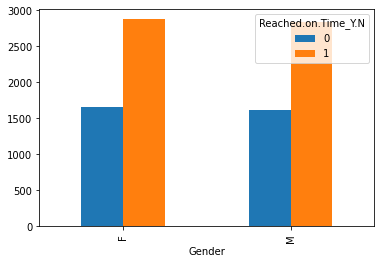

In [10]:
# Verificamos si hay alguna relación en cuanto a la llegada tarde del producto con el sexo del cliente.
group_sex = E_Commerce_train.groupby(['Reached.on.Time_Y.N', 'Gender']).count()['ID']
group_sex.unstack(level=0).plot.bar()
plt.show()
# Corroboramos con un grafico y notamos que las diferencias son muy pequeñas.

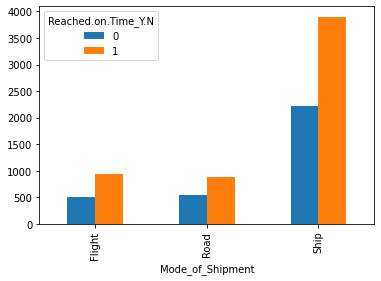

In [11]:
# Verificamos si hay alguna relación en cuanto al tipo de entrega.
group_mode_shipment = E_Commerce_train.groupby(['Reached.on.Time_Y.N', 'Mode_of_Shipment']).count()['ID']
group_mode_shipment.unstack(level=0).plot.bar()
plt.show()
# Podemos apreciar que en barco, la entrega se atrasa con respecto a las demas entregas.

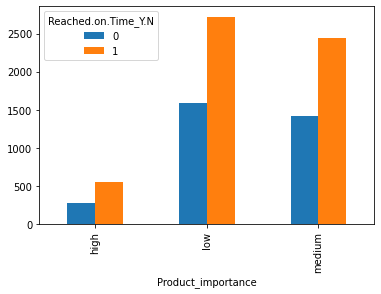

In [12]:
# Verificamos si hay alguna relación en cuanto a la importancia del producto.
group_importance = E_Commerce_train.groupby(['Reached.on.Time_Y.N', 'Product_importance']).count()['ID']
group_importance.unstack(level=0).plot.bar()
plt.show()
# Podemos apreciar que los productos con media y baja importacia, suelen tener una demora en la entrega.

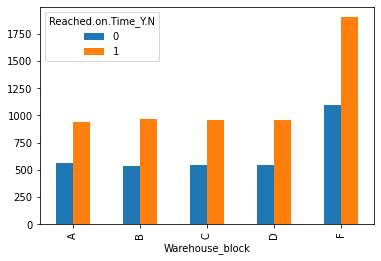

In [13]:
# Verificamos si hay alguna relación con el Bloque de Almacen.
group_Warehouse = E_Commerce_train.groupby(['Reached.on.Time_Y.N', 'Warehouse_block']).count()['ID']
group_Warehouse.unstack(level=0).plot.bar()
plt.show()
# Podemos notar que en los bloques de Almacenes de categoria F, la entrega se demora.

PROCESAMIENTO DE LOS DATOS

Selecciono las variables que creo que son las adecuadas para para luego implementar mi modeo de Machine Learning.

	1) Warehouse_block
	2) Mode_of_Shipment
	3) Product_importance
	4) Reached.on.Time_Y.N

In [14]:
df_final = E_Commerce_train[['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Reached.on.Time_Y.N' ]]
df_final.head()

,Warehouse_block,Mode_of_Shipment,Product_importance,Reached.on.Time_Y.N
0,D,Flight,low,1
1,F,Flight,low,1
2,A,Flight,low,1
3,B,Flight,medium,1
4,C,Flight,medium,1


In [15]:
# Volvemos a corroborar que no hayamos pasado por alto algun valor nulo.
df_final.isnull().sum()

Warehouse_block        0
Mode_of_Shipment       0
Product_importance     0
Reached.on.Time_Y.N    0
dtype: int64

In [16]:
# Observamos de que tipo son las variables.
df_final.info()
# Modificaremos las variables de tipo object y las pasaremos a int o float.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8999 entries, 0 to 8998
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Warehouse_block      8999 non-null   object
 1   Mode_of_Shipment     8999 non-null   object
 2   Product_importance   8999 non-null   object
 3   Reached.on.Time_Y.N  8999 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 281.3+ KB


In [17]:
# Pasamos a 'category' los datos de la variable 'Warehouse_block', para que python los interprete de manera mas adecuada.
df_final['Warehouse_block'] = df_final['Warehouse_block'].astype('category')

C:\Users\agust\AppData\Local\Temp\ipykernel_18648\1658130110.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['Warehouse_block'] = df_final['Warehouse_block'].astype('category')


In [18]:
# Pasamos a 'category' los datos de la variable 'Mode_of_Shipment', para que python los interprete de manera mas adecuada.
df_final['Mode_of_Shipment'] = df_final['Mode_of_Shipment'].astype('category')


C:\Users\agust\AppData\Local\Temp\ipykernel_18648\2028774072.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['Mode_of_Shipment'] = df_final['Mode_of_Shipment'].astype('category')


In [19]:
# Pasamos a 'category' los datos de la variable 'Product_importance', para que python los interprete de manera mas adecuada.
df_final['Product_importance'] = df_final['Product_importance'].astype('category')

C:\Users\agust\AppData\Local\Temp\ipykernel_18648\229672011.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['Product_importance'] = df_final['Product_importance'].astype('category')


In [20]:
# Volvemos a observar de que tipo son ahora las variables.
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8999 entries, 0 to 8998
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Warehouse_block      8999 non-null   category
 1   Mode_of_Shipment     8999 non-null   category
 2   Product_importance   8999 non-null   category
 3   Reached.on.Time_Y.N  8999 non-null   int64   
dtypes: category(3), int64(1)
memory usage: 97.3 KB


Codificación de variables utilizando One-Hot

In [21]:
# Importamos la libreria
from sklearn.preprocessing import OneHotEncoder

codificador = OneHotEncoder()
codificador_1 = OneHotEncoder()
codificador_2 = OneHotEncoder()

codificacion = codificador.fit_transform(df_final[['Warehouse_block']])
codificacion_1 = codificador_1.fit_transform(df_final[['Mode_of_Shipment']])
codificacion_2 = codificador_2.fit_transform(df_final[['Product_importance']])

In [22]:
# Creamos el DataFrame codificado.
col_mode_of_Shipment = pd.DataFrame(codificacion_1.toarray(), columns = codificador_1.categories_)
col_Warehouse_block = pd.DataFrame(codificacion.toarray(), columns = codificador.categories_)
col_Product_importance = pd.DataFrame(codificacion_2.toarray(), columns = codificador_2.categories_)

Ahora debemos concatenar los DataFrame a la tabla que vamos a usar y luego eliminamos las columnas categoricas.

In [23]:
df_final = pd.concat([df_final, col_mode_of_Shipment], axis= 1)

In [24]:
df_final = pd.concat([df_final, col_Warehouse_block], axis= 1)

In [25]:
df_final = pd.concat([df_final, col_Product_importance], axis= 1)

In [26]:
# ELiminamos las columnas categoricas.
df_final.drop(['Warehouse_block'], axis=1, inplace=True)
df_final.drop(['Mode_of_Shipment'], axis=1, inplace=True)
df_final.drop(['Product_importance'], axis=1, inplace=True)

In [27]:
# Mostramos como quedo el DataFrame final con el que vamos a trabajar.
df_final.head()

,Reached.on.Time_Y.N,"(Flight,)","(Road,)","(Ship,)","(A,)","(B,)","(C,)","(D,)","(F,)","(high,)","(low,)","(medium,)"
0,1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


Con estos datos ya podemos realizar el modelo.

In [28]:
# Definimos la variable dependiente.
y_train = df_final['Reached.on.Time_Y.N']

In [29]:
df_final.columns

Index(['Reached.on.Time_Y.N',           ('Flight',),             ('Road',),
                   ('Ship',),                ('A',),                ('B',),
                      ('C',),                ('D',),                ('F',),
                   ('high',),              ('low',),           ('medium',)],
      dtype='object')

In [30]:
# Preprocesamos las variables independientes.
x_train = df_final[[('Flight',), ('Road',), ('Ship',), ('A',), ('B',), ('C',), ('D',), ('F',), ('high',), ('low',), ('medium',)]]

In [31]:
# Corroboramos sus dimenciones.
y_train.shape, x_train.shape

((8999,), (8999, 11))

MODELO

## **2. Vecinos más cercanos**

In [45]:
# Comenzamos entrenando el modelo
from sklearn.neighbors import KNeighborsClassifier

# Instanciamos un objeto de la clase KNeighborsClassifier
KNeigh = KNeighborsClassifier()

KNeigh.fit(x_train, y_train) 

KNeighborsClassifier()

In [46]:
# Predecimos sobre nuestro set de entrenamieto

y_train_pred = KNeigh.predict(x_train)

c:\Users\agust\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


EVALUACIÓN DEL MODELO

### **`Exactitud`**

In [49]:
from sklearn.metrics import accuracy_score

exactitud = accuracy_score(y_train, y_train_pred)
print(exactitud)

0.6355150572285809


EVALUAMOS SOBRE EL TEST

Ahora vamos a crear la columna 'pred' para poder crear el archivo.csv y poder mandarlo para mirar el score que logramos.

In [38]:
df_final_test = E_Commerce_test[['Warehouse_block', 'Mode_of_Shipment', 'Product_importance']]
df_final_test.head()

,Warehouse_block,Mode_of_Shipment,Product_importance
0,F,Ship,medium
1,D,Ship,high
2,F,Ship,low
3,A,Ship,medium
4,B,Ship,low


In [39]:
# Pasamos a 'category' los datos, para que python los interprete de manera mas adecuada.
df_final_test['Warehouse_block'] = df_final_test['Warehouse_block'].astype('category')
df_final_test['Mode_of_Shipment'] = df_final_test['Mode_of_Shipment'].astype('category')
df_final_test['Product_importance'] = df_final_test['Product_importance'].astype('category')

C:\Users\agust\AppData\Local\Temp\ipykernel_18648\3898529246.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_test['Warehouse_block'] = df_final_test['Warehouse_block'].astype('category')
C:\Users\agust\AppData\Local\Temp\ipykernel_18648\3898529246.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_test['Mode_of_Shipment'] = df_final_test['Mode_of_Shipment'].astype('category')
C:\Users\agust\AppData\Local\Temp\ipykernel_18648\3898529246.py:4: SettingWithCopyWarning: 
A value is trying 

In [40]:
# Codificación de variables utilizando One-Hot
# Importamos la libreria
from sklearn.preprocessing import OneHotEncoder

codificador_test = OneHotEncoder()
codificador_1_test  = OneHotEncoder()
codificador_2_test  = OneHotEncoder()

codificacion_test  = codificador_test.fit_transform(df_final_test[['Warehouse_block']])
codificacion_1_test  = codificador_1_test.fit_transform(df_final_test[['Mode_of_Shipment']])
codificacion_2_test  = codificador_2_test.fit_transform(df_final_test[['Product_importance']])

# Creamos el DataFrame codificado.
col_mode_of_Shipment_test  = pd.DataFrame(codificacion_1_test.toarray(), columns = codificador_1_test.categories_)
col_Warehouse_block_test  = pd.DataFrame(codificacion_test.toarray(), columns = codificador_test.categories_)
col_Product_importance_test  = pd.DataFrame(codificacion_2_test.toarray(), columns = codificador_2_test.categories_)

df_final_test = pd.concat([df_final_test, col_mode_of_Shipment_test ], axis= 1)
df_final_test = pd.concat([df_final_test, col_Warehouse_block_test ], axis= 1)
df_final_test = pd.concat([df_final_test, col_Product_importance_test ], axis= 1)

# ELiminamos las columnas categoricas.
df_final_test.drop(['Warehouse_block'], axis=1, inplace=True)
df_final_test.drop(['Mode_of_Shipment'], axis=1, inplace=True)
df_final_test.drop(['Product_importance'], axis=1, inplace=True)

In [41]:
df_final_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   (Flight,)  2000 non-null   float64
 1   (Road,)    2000 non-null   float64
 2   (Ship,)    2000 non-null   float64
 3   (A,)       2000 non-null   float64
 4   (B,)       2000 non-null   float64
 5   (C,)       2000 non-null   float64
 6   (D,)       2000 non-null   float64
 7   (F,)       2000 non-null   float64
 8   (high,)    2000 non-null   float64
 9   (low,)     2000 non-null   float64
 10  (medium,)  2000 non-null   float64
dtypes: float64(11)
memory usage: 172.0 KB


In [42]:
# Apreciamos sus dimenciones
df_final_test.shape

(2000, 11)

In [43]:
X_train_test = df_final_test[[('Flight',), ('Road',), ('Ship',), ('A',), ('B',), ('C',), ('D',), ('F',), ('high',), ('low',), ('medium',)]]

In [50]:
# Sacamos los valores a predecir
pred = KNeigh.predict(X_train_test)

c:\Users\agust\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [51]:
# Descargamos los datos a un archivo.csv
pred = pd.DataFrame(pred, columns=['pred'])
pred.to_csv('AgustinBraida.csv')